In [ ]:
import pandas                                as pd
import matplotlib.pyplot                     as plt
import numpy                                 as np
from sklearn.feature_extraction.text         import TfidfVectorizer
from sklearn.model_selection                 import train_test_split
from sklearn.ensemble                        import RandomForestClassifier
from sklearn.svm                             import SVC
from sklearn.metrics                         import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline                        import Pipeline
from sklearn.metrics                         import confusion_matrix
from sklearn.svm                             import SVC
from sklearn.dummy                           import DummyClassifier

In [ ]:
dataset = pd.read_csv("spam.csv", error_bad_lines=False, engine="python")
dataset

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will �_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [ ]:
dataset.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [ ]:
dataset = dataset.rename({'v1': 'Class', 'v2': 'Narrative'}, axis=1)
dataset =  dataset[['Class','Narrative']]
dataset

,Class,Narrative
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will �_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


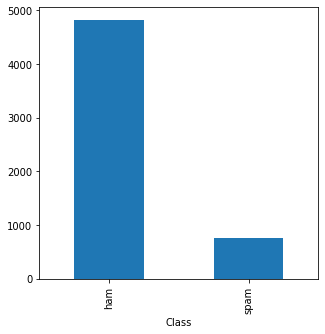

In [ ]:
fig = plt.figure(figsize=(5,5))
dataset.groupby('Class').Narrative.count().plot.bar(ylim=0)
plt.show()

In [ ]:
feature_train, feature_test, result_train, result_test = train_test_split(dataset['Narrative'], dataset['Class'], test_size = 0.2, random_state=0)

### Dummy Classifier

* The dummy classifier gives you a measure of “baseline” performance — i.e. the success rate one should expect to achieve even if simply guessing.

In [ ]:
clf = DummyClassifier(strategy="most_frequent", random_state=0)
clf.fit(feature_train, result_train)

dummy_pred = clf.predict(feature_test)

accuracy_score(result_test, dummy_pred)

0.8511210762331839

In [ ]:
clf = Pipeline([('tfidf', TfidfVectorizer()), ('clf', RandomForestClassifier(n_estimators=100, n_jobs=-1))])
clf.fit(feature_train, result_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None

In [ ]:
result_pred = clf.predict(feature_test)
print(classification_report(result_test, result_pred))

              precision    recall  f1-score   support

         ham       0.97      1.00      0.98       949
        spam       1.00      0.81      0.90       166

    accuracy                           0.97      1115
   macro avg       0.98      0.91      0.94      1115
weighted avg       0.97      0.97      0.97      1115



In [ ]:
result_pred

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [ ]:
teste = result_test.to_numpy()
teste

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [ ]:
confusion_matrix(teste, result_pred)

array([[949,   0],
       [ 31, 135]])

In [ ]:
y_actu = pd.Series(teste, name='Actual')
y_pred = pd.Series(result_pred, name='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred)
df_confusion

Predicted,ham,spam
Actual,,
ham,949,0
spam,31,135


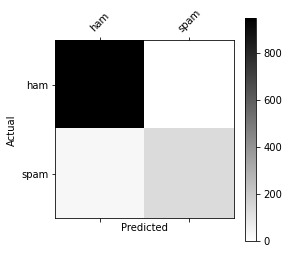

In [ ]:
def plot_confusion_matrix(df_confusion, title='Confusion matrix', cmap=plt.cm.gray_r):
    plt.matshow(df_confusion, cmap=cmap) # imshow
    plt.colorbar()
    tick_marks = np.arange(len(df_confusion.columns))
    plt.xticks(tick_marks, df_confusion.columns, rotation=45)
    plt.yticks(tick_marks, df_confusion.index)
    plt.ylabel(df_confusion.index.name)
    plt.xlabel(df_confusion.columns.name)

plot_confusion_matrix(df_confusion)

In [ ]:
#Shoub give as Spam
clf.predict(["Thank you for subscribing to our channel!"])

array(['ham'], dtype=object)

In [ ]:
accuracy_score(result_test, result_pred)

0.9721973094170404

In [ ]:
clf = Pipeline([('tfidf', TfidfVectorizer()), ('clf', SVC(C = 1000, gamma = 'auto'))])
clf.fit(feature_train, result_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 SVC(C=1000, break_ties=False, cache_size=200,
                     class_weight=None, coef0=0.0,
                     decision_fun

In [ ]:
result_pred = clf.predict(feature_test)
print(classification_report(result_test, result_pred))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       949
        spam       0.99      0.79      0.88       166

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115



In [ ]:
#Spam test
clf.predict(["You gained a free ticket to travel. Use the password: VCXZ786V to get it!"])

array(['ham'], dtype=object)

In [ ]:
teste = result_test.to_numpy()
y_actu = pd.Series(teste, name='Actual')
y_pred = pd.Series(result_pred, name='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred)
df_confusion

Predicted,ham,spam
Actual,,
ham,948,1
spam,35,131


In [ ]:
accuracy_score(result_test, result_pred)

0.967713004484305